In [169]:
#install.packages(c("drc", "Hmisc", "reshape"))

In [170]:
library("tidyverse")
library("drc")
library("reshape")
library("Hmisc")

In [171]:
outdir = "./Output/221208_FRNT/"
indir = "./CSV/221208_FRNT/"

In [172]:
parse_file <- function(filename) {
    df1 = read.csv(filename, header = FALSE, skip = 1, stringsAsFactors = FALSE)

    df1_firstrow <- read.csv(filename,nrows=1, header=FALSE, stringsAsFactors = FALSE)
    Virus = as.character(df1_firstrow[1,2])
    Serum1 = df1_firstrow[1,4]
    Serum2 = df1_firstrow[1,6]
    StartConc = df1_firstrow[1,8]
    DiluFactor = df1_firstrow[1,10]
    PlateID = df1_firstrow[1,12]
    DateID = df1_firstrow[1,14]
    PassageID = df1_firstrow[1,16]
    

    Concentrations = c(StartConc/DiluFactor^(0:6), 0)
   
    df11 <- cbind(Concentrations, df1[, 1:6])
    colnames(df11) <- c("Concentration", "Rep1", "Rep2", "Rep3", "Rep4", "Rep5", "Rep6")
    df12 = melt(df11, id=c("Concentration")) 
    colnames(df12) = c("Concentration", "Rep", "Titers")
    df12
    df13 = cbind(Virus, Serum1, PlateID, DateID, PassageID, df12)
    colnames(df13) = c("Virus", "Serum", "PlateID", "DateID", "PassageID", "Concentration", "Rep", "Titers")
    
    df21 <- cbind(Concentrations, df1[, 7:12])
    colnames(df21) <- c("Concentration", "Rep1", "Rep2", "Rep3", "Rep4", "Rep5", "Rep6")
    df22 = melt(df21, id=c("Concentration")) 
    colnames(df22) = c("Concentration", "Rep", "Titers")
    df22
    df23 = cbind(Virus, Serum2, PlateID, DateID, PassageID, df22)
    colnames(df23) = c("Virus", "Serum", "PlateID", "DateID", "PassageID", "Concentration", "Rep", "Titers")

    df1_all = rbind(df13, df23)
    return(df1_all)
}

In [173]:
file_list = list.files(path = indir, pattern = ".csv", full.names = TRUE)

In [174]:
file_list

[1] "./CSV/221208_FRNT//3015856016-VT3--V1-614D (bright)(D1)--3001241328-3001241322.csv"          
 [2] "./CSV/221208_FRNT//3015856016-VT3--V1-614D (bright)(D1)--3001241329-3001241336.csv"          
 [3] "./CSV/221208_FRNT//3015856016-VT3--V1-614D (bright)(D1)--V2010022B2-V2002080B2.csv"          
 [4] "./CSV/221208_FRNT//3015856016-VT3--V1-614D (bright)(D1)--V2010026B2-V2010004B2.csv"          
 [5] "./CSV/221208_FRNT//3015882100-2-VT3--V13-BA.1_bright_omicron (D1)--3001241328-3001241322.csv"
 [6] "./CSV/221208_FRNT//3015882100-2-VT3--V13-BA.1_bright_omicron (D1)--3001241329-3001241336.csv"
 [7] "./CSV/221208_FRNT//3015882100-2-VT3--V13-BA.1_bright_omicron (D1)--V2010022B2-V2002080B2.csv"
 [8] "./CSV/221208_FRNT//3015882100-2-VT3--V13-BA.1_bright_omicron (D1)--V2010026B2-V2010004B2.csv"
 [9] "./CSV/221208_FRNT//3015882100-VT3--V2-BA.1_bright_omicron (D1)--3001241328-3001241322.csv"   
[10] "./CSV/221208_FRNT//3015882100-VT3--V2-BA.1_bright_omicron (D1)--3001241329-3001241336.csv"   
[11] "./CSV/221208_FRNT//3015882100-VT3--V2-BA.1_bright_omicron (D1)--V2010022B2-V2002080B2.csv"   
[12] "./CSV/221208_FRNT//3015882100-VT3--V2-BA.1_bright_omicron (D1)--V2010026B2-V2010004B2.csv"   
[13] "./CSV/221208_FRNT//3015902582-VT3--V6-BA.5(bright omicron (D2)--3001241328-3001241322.csv"   
[14] "./CSV/221208_FRNT//3015902582-VT3--V6-BA.5(bright omicron (D2)--3001241329-3001241336.csv"   
[15] "./CSV/221208_FRNT//3015902582-VT3--V6-BA.5(bright omicron (D2)--V2010022B2-V2002080B2.csv"   
[16] "./CSV/221208_FRNT//3015902582-VT3--V6-BA.5(bright omicron (D2)--V2010026B2-V2010004B2.csv"   
[17] "./CSV/221208_FRNT//3015913105-VT3--V4-BA.2.75(Bette Korber)(D1)--3001241328-3001241322.csv"  
[18] "./CSV/221208_FRNT//3015913105-VT3--V4-BA.2.75(Bette Korber)(D1)--3001241329-3001241336.csv"  
[19] "./CSV/221208_FRNT//3015913105-VT3--V4-BA.2.75(Bette Korber)(D1)--V2010022B2-V2002080B2.csv"  
[20] "./CSV/221208_FRNT//3015913105-VT3--V4-BA.2.75(Bette Korber)(D1)--V2010026B2-V2010004B2.csv"  
[21] "./CSV/221208_FRNT//3015913702-VT2--V3-BA.2(bright omicron) (D2)--3001241328-3001241322.csv"  
[22] "./CSV/221208_FRNT//3015913702-VT2--V3-BA.2(bright omicron) (D2)--3001241329-3001241336.csv"  
[23] "./CSV/221208_FRNT//3015913702-VT2--V3-BA.2(bright omicron) (D2)--V2010022B2-V2002080B2.csv"  
[24] "./CSV/221208_FRNT//3015913702-VT2--V3-BA.2(bright omicron) (D2)--V2010026B2-V2010004B2.csv"  
[25] "./CSV/221208_FRNT//3015920009-VN0VT3--V5-BA.2.75.2 --3001241328-3001241322.csv"              
[26] "./CSV/221208_FRNT//3015920009-VN0VT3--V5-BA.2.75.2 --3001241329-3001241336.csv"              
[27] "./CSV/221208_FRNT//3015920009-VN0VT3--V5-BA.2.75.2 --V2010022B2-V2002080B2.csv"              
[28] "./CSV/221208_FRNT//3015920009-VN0VT3--V5-BA.2.75.2 --V2010026B2-V2010004B2.csv"              
[29] "./CSV/221208_FRNT//3015920682-VN0VT2--V7-BQ.1 --3001241328-3001241322.csv"                   
[30] "./CSV/221208_FRNT//3015920682-VN0VT2--V7-BQ.1 --3001241329-3001241336.csv"                   
[31] "./CSV/221208_FRNT//3015920682-VN0VT2--V7-BQ.1 --V2010022B2-V2002080B2.csv"                   
[32] "./CSV/221208_FRNT//3015920682-VN0VT2--V7-BQ.1 --V2010026B2-V2010004B2.csv"                   
[33] "./CSV/221208_FRNT//3015920687-VN0VT2--V8-BQ.1.1--3001241328-3001241322.csv"                  
[34] "./CSV/221208_FRNT//3015920687-VN0VT2--V8-BQ.1.1--3001241329-3001241336.csv"                  
[35] "./CSV/221208_FRNT//3015920687-VN0VT2--V8-BQ.1.1--V2010022B2-V2002080B2.csv"                  
[36] "./CSV/221208_FRNT//3015920687-VN0VT2--V8-BQ.1.1--V2010026B2-V2010004B2.csv"                  
[37] "./CSV/221208_FRNT//3015920688-VN0VT2--V9-XBB--3001241328-3001241322.csv"                     
[38] "./CSV/221208_FRNT//3015920688-VN0VT2--V9-XBB--3001241329-3001241336.csv"                     
[39] "./CSV/221208_FRNT//3015920688-VN0VT2--V9-XBB--V2010022B2-V2002080B2.csv"                     
[40] "./CSV/221208_FRNT//3015920688-VN0VT2--V9-XBB--V2010026B2-V2010004B2.csv"                     
[

In [200]:
df <- data.frame(Virus=character(), Serum=character(), PlateID = character(), DateID=numeric(), PassageID=character(), Concentration=numeric(), Rep=character(),Titers=numeric(), stringsAsFactors=FALSE) 
tryCatch({
        for (i in file_list){
        print(i)
        file1 = parse_file(i)
        df = rbind(df, file1)
    }

    
    }, error=function(e){cat("ERROR :",conditionMessage(e), "\n")})

df$SerumDate = paste0(df$Serum, "-", df$DateID)


[1] "./CSV/221208_FRNT//3015856016-VT3--V1-614D (bright)(D1)--3001241328-3001241322.csv"
[1] "./CSV/221208_FRNT//3015856016-VT3--V1-614D (bright)(D1)--3001241329-3001241336.csv"
[1] "./CSV/221208_FRNT//3015856016-VT3--V1-614D (bright)(D1)--V2010022B2-V2002080B2.csv"
[1] "./CSV/221208_FRNT//3015856016-VT3--V1-614D (bright)(D1)--V2010026B2-V2010004B2.csv"
[1] "./CSV/221208_FRNT//3015882100-2-VT3--V13-BA.1_bright_omicron (D1)--3001241328-3001241322.csv"
[1] "./CSV/221208_FRNT//3015882100-2-VT3--V13-BA.1_bright_omicron (D1)--3001241329-3001241336.csv"
[1] "./CSV/221208_FRNT//3015882100-2-VT3--V13-BA.1_bright_omicron (D1)--V2010022B2-V2002080B2.csv"
[1] "./CSV/221208_FRNT//3015882100-2-VT3--V13-BA.1_bright_omicron (D1)--V2010026B2-V2010004B2.csv"
[1] "./CSV/221208_FRNT//3015882100-VT3--V2-BA.1_bright_omicron (D1)--3001241328-3001241322.csv"
[1] "./CSV/221208_FRNT//3015882100-VT3--V2-BA.1_bright_omicron (D1)--3001241329-3001241336.csv"
[1] "./CSV/221208_FRNT//3015882100-VT3--V2-BA.1_bright_o

In [176]:
#df=df[complete.cases(df), ]
head(df)

,Virus,Serum,PlateID,DateID,PassageID,Concentration,Rep,Titers,SerumDate
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<fct>,<int>,<chr>
1,3015856016-VT3,3001241328,Plate 4V1_P1328_P1322,1_6_2023 2:16:29 PM,VT3,0.1000000000,Rep1,1,3001241328-1_6_2023 2:16:29 PM
2,3015856016-VT3,3001241328,Plate 4V1_P1328_P1322,1_6_2023 2:16:29 PM,VT3,0.0333333333,Rep1,1,3001241328-1_6_2023 2:16:29 PM
3,3015856016-VT3,3001241328,Plate 4V1_P1328_P1322,1_6_2023 2:16:29 PM,VT3,0.0111111111,Rep1,1,3001241328-1_6_2023 2:16:29 PM
4,3015856016-VT3,3001241328,Plate 4V1_P1328_P1322,1_6_2023 2:16:29 PM,VT3,0.0037037037,Rep1,1,3001241328-1_6_2023 2:16:29 PM
5,3015856016-VT3,3001241328,Plate 4V1_P1328_P1322,1_6_2023 2:16:29 PM,VT3,0.0012345679,Rep1,7,3001241328-1_6_2023 2:16:29 PM
6,3015856016-VT3,3001241328,Plate 4V1_P1328_P1322,1_6_2023 2:16:29 PM,VT3,0.0004115226,Rep1,34,3001241328-1_6_2023 2:16:29 PM


In [177]:
#Serum_uniq = unique(df$Serum)
#df_serum_set = subset(df, Serum == Serum_uniq[1])

In [178]:
#Virus_uniq = unique(df_serum_set$Virus)
#df_serum_virus_set = subset(df_serum_set, Virus == Virus_uniq[1])

In [179]:
#curved_fit <- drm(formula = Titers ~ Concentration, data = df_serum_virus_set, fct = LL.3(names = c("hill", "max_value", "ec_50")))

In [180]:
#parameters = data.frame(Serum=Serum_uniq[1], Virus=Virus_uniq[1], ec50=as.numeric(curved_fit$coef[3]), hill=as.numeric(curved_fit$coef[1]), max = as.numeric(curved_fit$coef[2]))
#hill = as.numeric(curved_fit$coef[1])
#max = as.numeric(curved_fit$coef[2])
#ec50 = as.numeric(curved_fit$coef[3])

In [181]:
#df$Serum[1]

In [182]:
final_ec50 = data.frame(Serum=character(), Virus=numeric(), PassageID=character(), PlateID=character(), SerumDate=character(), PlateMinConc=numeric(), PlateMaxConc=numeric(), ec50=numeric(), hill=numeric(), max=numeric(), Report=character(), stringsAsFactors=FALSE) 

Serum_uniq = unique(df$SerumDate)

for (i in Serum_uniq){

    print(paste0("Serum: ", i))
    df_serum_set = subset(df, SerumDate == i)
    Virus_uniq = unique(df_serum_set$Virus)
    #print(Virus_uniq)
    for (j in Virus_uniq){
        tryCatch({
            df_serum_virus_set = subset(df_serum_set, Virus == j)
            min_conc <- min(df_serum_virus_set$Concentration[!df_serum_virus_set$Concentration == 0])
            max_conc <- max(df_serum_virus_set$Concentration)
            print(paste0("Virus: ", j))
            curve_fit <- drm(formula = Titers ~ Concentration, data = df_serum_virus_set, fct = LL.3(names = c("hill", "max_value", "ec_50")))
            parameters = data.frame(Serum=df_serum_virus_set$Serum[1], 
                                Virus=j, 
                                PassageID=df_serum_virus_set$PassageID[1],
                                PlateID=df_serum_virus_set$PlateID[1],
                                SerumDate=i, PlateMinConc=min_conc, PlateMaxConc=max_conc, 
                                ec50=as.numeric(curve_fit$coef[3]), hill=as.numeric(curve_fit$coef[1]), max = as.numeric(curve_fit$coef[2]), Report=round(1/as.numeric(curve_fit$coef[3])))
            if(as.numeric(curve_fit$coef[1]) < 0.5 | as.numeric(curve_fit$coef[1]) > 2){
                curve_fit <- drm(formula = Titers ~ Concentration, data = df_serum_virus_set, fct = LL.3(fixed = c(1, NA, NA), names = c("hill", "max_value", "ec_50")))
                parameters = data.frame(Serum=df_serum_virus_set$Serum[1], 
                                Virus=j, 
                                PassageID=df_serum_virus_set$PassageID[1],
                                PlateID=df_serum_virus_set$PlateID[1],
                                SerumDate=i, PlateMinConc=min_conc, PlateMaxConc=max_conc, 
                                ec50=as.numeric(curve_fit$coef[2]), hill=1, max = as.numeric(curve_fit$coef[1]), Report=round(1/as.numeric(curve_fit$coef[2])))
                #print("refitting")
                #print(i)
                #print(j)
            }
            if(parameters$ec50 > 0.75 * max(df_serum_virus_set$Concentration)){
                parameters$Report=paste0("< ", round(1/(0.75 * max(df_serum_virus_set$Concentration))))
            }
            #print(paste0("min_conc:", min_conc))
            #print(paste0("ec50 :", parameters$ec50))
            if(parameters$ec50 < 1.25 * min_conc){
            #print("less than reached")
            #parameters$OutOfRange="Lowest Concentration of Serum is not low enough to get accurate EC50 measure"
               parameters$Report=paste0("> ", round(1/(1.25 * min_conc)))
        
           }
            
        }, error=function(e){cat("ERROR :",conditionMessage(e), "\n")})
    
        
        final_ec50 = rbind(final_ec50, parameters)
    }
}


[1] "Serum: 3001241328-1_6_2023 2:16:29 PM"
[1] "Virus: 3015856016-VT3"
[1] "Serum: 3001241322-1_6_2023 2:16:29 PM"
[1] "Virus: 3015856016-VT3"
[1] "Serum: 3001241329-1_6_2023 2:16:28 PM"
[1] "Virus: 3015856016-VT3"
[1] "Serum: 3001241336-1_6_2023 2:16:28 PM"
[1] "Virus: 3015856016-VT3"
[1] "Serum: V2010022B2-1_6_2023 2:16:26 PM"
[1] "Virus: 3015856016-VT3"
[1] "Serum: V2002080B2-1_6_2023 2:16:26 PM"
[1] "Virus: 3015856016-VT3"
Error in optim(startVec, opfct, hessian = TRUE, method = optMethod, control = list(maxit = maxIt,  : 
  non-finite finite-difference value [3]
ERROR : Convergence failed 
[1] "Serum: V2010026B2-1_6_2023 2:16:27 PM"
[1] "Virus: 3015856016-VT3"
[1] "Serum: V2010004B2-1_6_2023 2:16:27 PM"
[1] "Virus: 3015856016-VT3"
[1] "Serum: 3001241328-12_9_2022 2:27:57 PM"
[1] "Virus: 3015882100-2-VT3"
[1] "Serum: 3001241322-12_9_2022 2:27:57 PM"
[1] "Virus: 3015882100-2-VT3"
[1] "Serum: 3001241329-12_9_2022 2:27:57 PM"
[1] "Virus: 3015882100-2-VT3"
[1] "Serum: 3001241336-12_9_

In [183]:
head(final_ec50)

,Serum,Virus,PassageID,PlateID,SerumDate,PlateMinConc,PlateMaxConc,ec50,hill,max,Report
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,3001241328,3015856016-VT3,VT3,Plate 4V1_P1328_P1322,3001241328-1_6_2023 2:16:29 PM,0.0001371742,0.1,0.0002058901,1.384611,83.45996,4857
2,3001241322,3015856016-VT3,VT3,Plate 4V1_P1328_P1322,3001241322-1_6_2023 2:16:29 PM,0.0001371742,0.1,0.0001660172,1.291178,69.62347,> 5832
3,3001241329,3015856016-VT3,VT3,Plate 3V1_M1329_M1336,3001241329-1_6_2023 2:16:28 PM,0.0001371742,0.1,0.0001830527,1.169465,78.48992,5463
4,3001241336,3015856016-VT3,VT3,Plate 3V1_M1329_M1336,3001241336-1_6_2023 2:16:28 PM,0.0001371742,0.1,0.0001407274,1.282181,64.64115,> 5832
5,V2010022B2,3015856016-VT3,VT3,Plate 1V1_M22B2_P80B2,V2010022B2-1_6_2023 2:16:26 PM,0.0001371742,0.1,0.0003753500,1.071837,86.06561,2664
6,V2010022B2,3015856016-VT3,VT3,Plate 1V1_M22B2_P80B2,V2010022B2-1_6_2023 2:16:26 PM,0.0001371742,0.1,0.0003753500,1.071837,86.06561,2664


In [184]:
ec80 = (80/20)^(1/final_ec50$hill)*final_ec50$ec50

In [185]:
ec70 = (70/30)^(1/final_ec50$hill)*final_ec50$ec50

In [186]:
ec60 = (60/40)^(1/final_ec50$hill)*final_ec50$ec50

In [187]:
final_ec50 = cbind(final_ec50, ec60, ec70, ec80)

In [188]:
final_ec50 = final_ec50[,c(1,2,3,4,5,6,7,8,12,13,14,9,10,11)]

In [189]:
head(final_ec50)

,Serum,Virus,PassageID,PlateID,SerumDate,PlateMinConc,PlateMaxConc,ec50,ec60,ec70,ec80,hill,max,Report
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,3001241328,3015856016-VT3,VT3,Plate 4V1_P1328_P1322,3001241328-1_6_2023 2:16:29 PM,0.0001371742,0.1,0.0002058901,0.0002759388,0.0003796621,0.0005603480,1.384611,83.45996,4857
2,3001241322,3015856016-VT3,VT3,Plate 4V1_P1328_P1322,3001241322-1_6_2023 2:16:29 PM,0.0001371742,0.1,0.0001660172,0.0002272654,0.0003199971,0.0004857807,1.291178,69.62347,> 5832
3,3001241329,3015856016-VT3,VT3,Plate 3V1_M1329_M1336,3001241329-1_6_2023 2:16:28 PM,0.0001371742,0.1,0.0001830527,0.0002589109,0.0003777723,0.0005989530,1.169465,78.48992,5463
4,3001241336,3015856016-VT3,VT3,Plate 3V1_M1329_M1336,3001241336-1_6_2023 2:16:28 PM,0.0001371742,0.1,0.0001407274,0.0001930705,0.0002725032,0.0004148948,1.282181,64.64115,> 5832
5,V2010022B2,3015856016-VT3,VT3,Plate 1V1_M22B2_P80B2,V2010022B2-1_6_2023 2:16:26 PM,0.0001371742,0.1,0.0003753500,0.0005479307,0.0008274666,0.0013681849,1.071837,86.06561,2664
6,V2010022B2,3015856016-VT3,VT3,Plate 1V1_M22B2_P80B2,V2010022B2-1_6_2023 2:16:26 PM,0.0001371742,0.1,0.0003753500,0.0005479307,0.0008274666,0.0013681849,1.071837,86.06561,2664


In [190]:
write.csv(final_ec50, file = paste0(outdir, "final_ec50.csv"), row.names = FALSE)

In [191]:
df_scale = merge(df, final_ec50, by = c("Serum", "Virus", "PassageID", "PlateID", "SerumDate"))

In [192]:
df_scale$Percent = (df_scale$Titers/df_scale$max) * 100
df_scale$Virus = as.character(df_scale$Virus)

In [193]:
head(df_scale)

,Serum,Virus,PassageID,PlateID,SerumDate,DateID,Concentration,Rep,Titers,PlateMinConc,PlateMaxConc,ec50,ec60,ec70,ec80,hill,max,Report,Percent
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,3001241322,3015856016-VT3,VT3,Plate 4V1_P1328_P1322,3001241322-1_6_2023 2:16:29 PM,1_6_2023 2:16:29 PM,0.0001371742,Rep1,45,0.0001371742,0.1,0.0001660172,0.0002272654,0.0003199971,0.0004857807,1.291178,69.62347,> 5832,64.633374
2,3001241322,3015856016-VT3,VT3,Plate 4V1_P1328_P1322,3001241322-1_6_2023 2:16:29 PM,1_6_2023 2:16:29 PM,0.0111111111,Rep1,1,0.0001371742,0.1,0.0001660172,0.0002272654,0.0003199971,0.0004857807,1.291178,69.62347,> 5832,1.436297
3,3001241322,3015856016-VT3,VT3,Plate 4V1_P1328_P1322,3001241322-1_6_2023 2:16:29 PM,1_6_2023 2:16:29 PM,0.0037037037,Rep1,1,0.0001371742,0.1,0.0001660172,0.0002272654,0.0003199971,0.0004857807,1.291178,69.62347,> 5832,1.436297
4,3001241322,3015856016-VT3,VT3,Plate 4V1_P1328_P1322,3001241322-1_6_2023 2:16:29 PM,1_6_2023 2:16:29 PM,0.0004115226,Rep1,20,0.0001371742,0.1,0.0001660172,0.0002272654,0.0003199971,0.0004857807,1.291178,69.62347,> 5832,28.725944
5,3001241322,3015856016-VT3,VT3,Plate 4V1_P1328_P1322,3001241322-1_6_2023 2:16:29 PM,1_6_2023 2:16:29 PM,0.0333333333,Rep1,1,0.0001371742,0.1,0.0001660172,0.0002272654,0.0003199971,0.0004857807,1.291178,69.62347,> 5832,1.436297
6,3001241322,3015856016-VT3,VT3,Plate 4V1_P1328_P1322,3001241322-1_6_2023 2:16:29 PM,1_6_2023 2:16:29 PM,0.0111111111,Rep3,1,0.0001371742,0.1,0.0001660172,0.0002272654,0.0003199971,0.0004857807,1.291178,69.62347,> 5832,1.436297


In [194]:
df_serum_set = subset(df_scale , Serum == unique(df_scale$Serum)[1])
df_serum_set = subset(df_serum_set, Concentration != 0)
head(df_serum_set)

,Serum,Virus,PassageID,PlateID,SerumDate,DateID,Concentration,Rep,Titers,PlateMinConc,PlateMaxConc,ec50,ec60,ec70,ec80,hill,max,Report,Percent
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,3001241322,3015856016-VT3,VT3,Plate 4V1_P1328_P1322,3001241322-1_6_2023 2:16:29 PM,1_6_2023 2:16:29 PM,0.0001371742,Rep1,45,0.0001371742,0.1,0.0001660172,0.0002272654,0.0003199971,0.0004857807,1.291178,69.62347,> 5832,64.633374
2,3001241322,3015856016-VT3,VT3,Plate 4V1_P1328_P1322,3001241322-1_6_2023 2:16:29 PM,1_6_2023 2:16:29 PM,0.0111111111,Rep1,1,0.0001371742,0.1,0.0001660172,0.0002272654,0.0003199971,0.0004857807,1.291178,69.62347,> 5832,1.436297
3,3001241322,3015856016-VT3,VT3,Plate 4V1_P1328_P1322,3001241322-1_6_2023 2:16:29 PM,1_6_2023 2:16:29 PM,0.0037037037,Rep1,1,0.0001371742,0.1,0.0001660172,0.0002272654,0.0003199971,0.0004857807,1.291178,69.62347,> 5832,1.436297
4,3001241322,3015856016-VT3,VT3,Plate 4V1_P1328_P1322,3001241322-1_6_2023 2:16:29 PM,1_6_2023 2:16:29 PM,0.0004115226,Rep1,20,0.0001371742,0.1,0.0001660172,0.0002272654,0.0003199971,0.0004857807,1.291178,69.62347,> 5832,28.725944
5,3001241322,3015856016-VT3,VT3,Plate 4V1_P1328_P1322,3001241322-1_6_2023 2:16:29 PM,1_6_2023 2:16:29 PM,0.0333333333,Rep1,1,0.0001371742,0.1,0.0001660172,0.0002272654,0.0003199971,0.0004857807,1.291178,69.62347,> 5832,1.436297
6,3001241322,3015856016-VT3,VT3,Plate 4V1_P1328_P1322,3001241322-1_6_2023 2:16:29 PM,1_6_2023 2:16:29 PM,0.0111111111,Rep3,1,0.0001371742,0.1,0.0001660172,0.0002272654,0.0003199971,0.0004857807,1.291178,69.62347,> 5832,1.436297


In [195]:
g = ggplot(df_serum_set, aes(x = log2(Concentration), y = Percent, color =SerumDate)) +
  theme_bw() +
  stat_summary(geom="point", fun=mean) +
  stat_summary(fun.data = mean_se, geom = "errorbar") +
  stat_smooth(method = "drm", mapping = aes(color = as.character(SerumDate)), method.args = list(fct = L.3()), se = FALSE)

In [196]:
g = g + coord_cartesian(ylim=c(100, 0)) + scale_x_reverse(breaks = rev(seq(floor(range(log2(df_serum_set$Concentration))[1]), ceiling(range(log2(df_serum_set$Concentration))[2]), 1)),
                       labels = -rev(seq(floor(range(log2(df_serum_set$Concentration))[1]), ceiling(range(log2(df_serum_set$Concentration))[2]), 1))) +
  scale_y_continuous(breaks = seq(0, 100, 10),
                     labels = 100 - seq(0, 100, 10)) +
  geom_hline(yintercept=50, linetype="dashed", color = "red", size=0.5) + 
  ylab("Percent Neutralization") + xlab("log[Dilution]") + ggtitle(Serum_uniq[1]) +
  theme(plot.title = element_text(hjust = 0.5))

`geom_smooth()` using formula 'y ~ x'



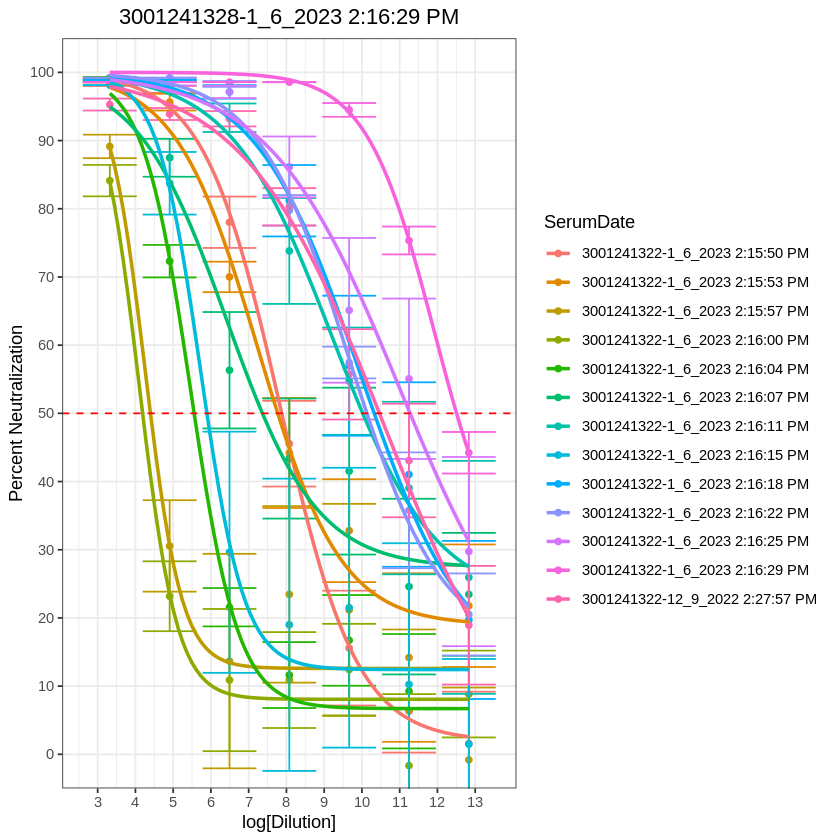

In [197]:
g

In [198]:
#ggsave(paste0(outdir, Serum_uniq[1], ".pdf"), plot = g, device = pdf, width = 6, height = 4)


In [199]:
for(Serum_uniq in unique(df_scale$SerumDate)){
    print(Serum_uniq)
    df_serum_set = subset(df_scale , SerumDate == Serum_uniq[1])
    df_serum_set = subset(df_serum_set, Concentration != 0)
    g = ggplot(df_serum_set, aes(x = log2(Concentration), y = Percent, color = Virus)) +
      theme_bw() +
      stat_summary(geom="point", fun=mean) +
      stat_summary(fun.data = mean_se, geom = "errorbar") +
      stat_smooth(method = "drm", mapping = aes(color = as.character(Virus)), method.args = list(fct = L.3()), se = FALSE)
    g = g + coord_cartesian(ylim=c(100, 0)) + scale_x_reverse(breaks = rev(seq(floor(range(log2(df_serum_set$Concentration))[1]), ceiling(range(log2(df_serum_set$Concentration))[2]), 1)),
                       labels = -rev(seq(floor(range(log2(df_serum_set$Concentration))[1]), ceiling(range(log2(df_serum_set$Concentration))[2]), 1))) +
          scale_y_continuous(breaks = seq(0, 100, 10), labels = 100 - seq(0, 100, 10)) +
          geom_hline(yintercept=50, linetype="dashed", color = "red", size=0.5) + 
  ylab("Percent Neutralization") + xlab("log[Dilution]") + ggtitle(Serum_uniq[1]) +
  theme(plot.title = element_text(hjust = 0.5))
    #ggsave(paste0(outdir, Serum_uniq, ".pdf"), plot = g, device = pdf, width = 8, height = 4)
     ggsave(paste0(outdir, Serum_uniq, ".png"))
    }

[1] "3001241322-1_6_2023 2:16:29 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "3001241322-12_9_2022 2:27:57 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "3001241322-1_6_2023 2:16:25 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "3001241322-1_6_2023 2:16:11 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "3001241322-1_6_2023 2:16:18 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "3001241322-1_6_2023 2:16:22 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "3001241322-1_6_2023 2:16:15 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "3001241322-1_6_2023 2:16:07 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "3001241322-1_6_2023 2:16:04 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "3001241322-1_6_2023 2:16:00 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "3001241322-1_6_2023 2:15:57 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "3001241322-1_6_2023 2:15:53 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "3001241322-1_6_2023 2:15:50 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "3001241328-1_6_2023 2:16:29 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "3001241328-12_9_2022 2:27:57 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "3001241328-1_6_2023 2:16:25 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "3001241328-1_6_2023 2:16:11 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "3001241328-1_6_2023 2:16:18 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "3001241328-1_6_2023 2:16:22 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "3001241328-1_6_2023 2:16:15 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "3001241328-1_6_2023 2:16:07 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "3001241328-1_6_2023 2:16:04 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "3001241328-1_6_2023 2:16:00 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "3001241328-1_6_2023 2:15:57 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "3001241328-1_6_2023 2:15:53 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "3001241328-1_6_2023 2:15:50 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "3001241329-1_6_2023 2:16:28 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "3001241329-12_9_2022 2:27:57 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "3001241329-1_6_2023 2:16:25 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "3001241329-1_6_2023 2:16:10 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "3001241329-1_6_2023 2:16:17 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "3001241329-1_6_2023 2:16:21 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "3001241329-1_6_2023 2:16:14 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "3001241329-1_6_2023 2:16:06 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "3001241329-1_6_2023 2:16:03 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "3001241329-1_6_2023 2:15:59 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "3001241329-1_6_2023 2:15:56 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "3001241329-1_6_2023 2:15:52 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "3001241329-1_6_2023 2:15:49 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "3001241336-1_6_2023 2:16:28 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "3001241336-12_9_2022 2:27:57 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "3001241336-1_6_2023 2:16:25 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "3001241336-1_6_2023 2:16:10 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "3001241336-1_6_2023 2:16:17 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "3001241336-1_6_2023 2:16:21 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "3001241336-1_6_2023 2:16:14 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "3001241336-1_6_2023 2:16:06 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "3001241336-1_6_2023 2:16:03 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "3001241336-1_6_2023 2:15:59 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'

Warning message in sqrt(diag(varMat)):
“NaNs produced”


[1] "3001241336-1_6_2023 2:15:56 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "3001241336-1_6_2023 2:15:52 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "3001241336-1_6_2023 2:15:49 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "V2002080B2-12_9_2022 2:27:54 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "V2002080B2-1_6_2023 2:16:15 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "V2002080B2-1_6_2023 2:16:12 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "V2002080B2-1_6_2023 2:16:05 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "V2002080B2-1_6_2023 2:16:01 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "V2002080B2-1_6_2023 2:15:57 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "V2002080B2-1_6_2023 2:15:54 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "V2002080B2-1_6_2023 2:15:51 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "V2002080B2-1_6_2023 2:15:47 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "V2010004B2-1_6_2023 2:16:27 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "V2010004B2-12_9_2022 2:27:56 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "V2010004B2-1_6_2023 2:16:24 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "V2010004B2-1_6_2023 2:16:09 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "V2010004B2-1_6_2023 2:16:16 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "V2010004B2-1_6_2023 2:16:20 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "V2010004B2-1_6_2023 2:16:13 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "V2010004B2-1_6_2023 2:16:05 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "V2010004B2-1_6_2023 2:16:02 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "V2010004B2-1_6_2023 2:15:58 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "V2010004B2-1_6_2023 2:15:55 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "V2010004B2-1_6_2023 2:15:51 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "V2010004B2-1_6_2023 2:15:48 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "V2010022B2-1_6_2023 2:16:26 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "V2010022B2-12_9_2022 2:27:54 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "V2010022B2-1_6_2023 2:16:23 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "V2010022B2-1_6_2023 2:16:08 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "V2010022B2-1_6_2023 2:16:15 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "V2010022B2-1_6_2023 2:16:19 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "V2010022B2-1_6_2023 2:16:12 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "V2010022B2-1_6_2023 2:16:05 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "V2010022B2-1_6_2023 2:16:01 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "V2010022B2-1_6_2023 2:15:57 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "V2010022B2-1_6_2023 2:15:54 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "V2010022B2-1_6_2023 2:15:51 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "V2010022B2-1_6_2023 2:15:47 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "V2010026B2-1_6_2023 2:16:27 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "V2010026B2-12_9_2022 2:27:56 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "V2010026B2-1_6_2023 2:16:24 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "V2010026B2-1_6_2023 2:16:09 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "V2010026B2-1_6_2023 2:16:16 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "V2010026B2-1_6_2023 2:16:20 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "V2010026B2-1_6_2023 2:16:13 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "V2010026B2-1_6_2023 2:16:05 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "V2010026B2-1_6_2023 2:16:02 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "V2010026B2-1_6_2023 2:15:58 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "V2010026B2-1_6_2023 2:15:55 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "V2010026B2-1_6_2023 2:15:51 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



[1] "V2010026B2-1_6_2023 2:15:48 PM"


Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'

